In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf


In [4]:
pip install yfinance

     ------------------------------------ 119.4/119.4 KB 500.9 kB/s eta 0:00:00
     -------------------------------------- 949.2/949.2 KB 1.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 187.3/187.3 KB 1.9 MB/s eta 0:00:00
     -------------------------------------- 176.8/176.8 KB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 1.3 MB/s eta 0:00:00
     -------------------------------------- 181.3/181.3 KB 3.6 MB/s eta 0:00:00
     -------------------------------------- 117.6/117.6 KB 6.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.2-py3-none-any.whl size=139153 sha256=2fc001d905e4c92a8e34c7788

You should consider upgrading via the 'c:\Users\kjkom\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# Download historical stock data from Yahoo Finance
data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
data.reset_index(inplace=True)
data.head()


C:\Users\kjkom\AppData\Local\Temp\ipykernel_16168\809852921.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.288578,24.757332,23.848704,24.746224,212818400
1,2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000
2,2015-01-06,23.606550,23.866475,23.244431,23.668754,263188400
3,2015-01-07,23.937574,24.037545,23.704307,23.815387,160423600
4,2015-01-08,24.857302,24.915063,24.148616,24.266361,237458000


In [3]:
# Keep only relevant columns
df = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Handle missing values (if any)
df = df.dropna()

# Feature and label
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [4]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [5]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


c:\Users\kjkom\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [6]:
def evaluate_model(y_true, y_pred, name):
    print(f"{name} - MSE: {mean_squared_error(y_true, y_pred):.2f}, R2 Score: {r2_score(y_true, y_pred):.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Linear Regression - MSE: 0.92, R2 Score: 1.00
Random Forest - MSE: 811.69, R2 Score: -0.02


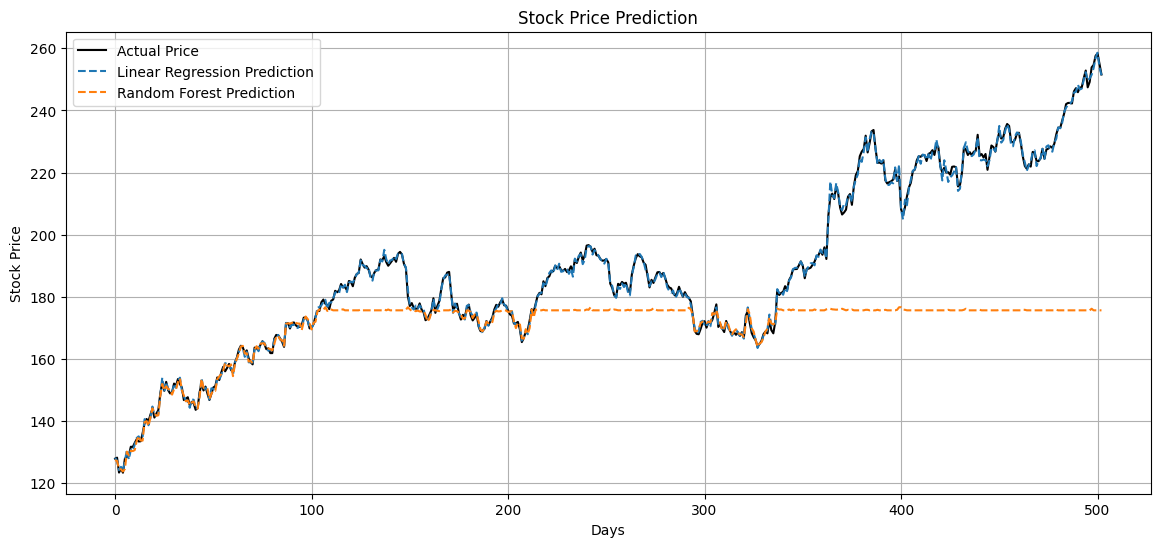

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual Price', color='black')
plt.plot(y_pred_lr, label='Linear Regression Prediction', linestyle='--')
plt.plot(y_pred_rf, label='Random Forest Prediction', linestyle='--')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
